In [24]:
import librosa
from librosa import load, display, feature
import numpy as np
from glob import glob
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

In [25]:
def extract(file):
    wave, sample_rate = librosa.load(file)
    mfcc = librosa.feature.mfcc(wave, sr = sample_rate, n_mfcc=20)
    mean_scaled_feature = np.mean(mfcc.T, axis = 0) #transpose of the mel frequency ceptral co-efficients

    return mean_scaled_feature

In [26]:
classes = os.listdir("data/genres_original")
classes

['hiphop', 'rock']

In [27]:
hiphop = glob(f"data/genres_original/{classes[0]}/*.*")
rock = glob(f"data/genres_original/{classes[1]}/*.*")

In [28]:
extracted_feature = []
label = []

In [29]:
for i in hiphop:
    feature = extract(i)
    extracted_feature.append([feature])
    label.append("hiphop")

C:\Users\venkatesh\AppData\Local\Temp\ipykernel_7164\3198454837.py:3: FutureWarning: Pass y=[-0.16915894 -0.021698    0.01956177 ...  0.07662964  0.03872681
 -0.02105713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wave, sr = sample_rate, n_mfcc=20)
C:\Users\venkatesh\AppData\Local\Temp\ipykernel_7164\3198454837.py:3: FutureWarning: Pass y=[ 0.0480957  -0.20150757 -0.25741577 ... -0.01766968 -0.0352478
 -0.00881958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wave, sr = sample_rate, n_mfcc=20)
C:\Users\venkatesh\AppData\Local\Temp\ipykernel_7164\3198454837.py:3: FutureWarning: Pass y=[-0.03308105 -0.04275513 -0.04620361 ...  0.11807251  0.11425781
  0.11431885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wave, sr = sample_rate, n_mfcc=20)
C:

In [30]:
for i in rock:
    feature = extract(i)
    extracted_feature.append([feature])
    label.append("rock")

C:\Users\venkatesh\AppData\Local\Temp\ipykernel_7164\3198454837.py:3: FutureWarning: Pass y=[-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wave, sr = sample_rate, n_mfcc=20)
C:\Users\venkatesh\AppData\Local\Temp\ipykernel_7164\3198454837.py:3: FutureWarning: Pass y=[0.36239624 0.6494751  0.6317444  ... 0.04336548 0.0557251  0.05700684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wave, sr = sample_rate, n_mfcc=20)
C:\Users\venkatesh\AppData\Local\Temp\ipykernel_7164\3198454837.py:3: FutureWarning: Pass y=[-0.08190918 -0.11526489 -0.08959961 ... -0.19174194 -0.31488037
 -0.15615845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wave, sr = sample_rate, n_mfcc=20)
C:\Users

In [32]:
dic = {
    'data' : extracted_feature,
    'label' : label
}

df = pd.DataFrame(dic)
df.to_csv("data.csv", header = True, index = False)

In [33]:
data = np.array(extracted_feature)
label = np.array(label)

In [34]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
label = l.fit_transform(label)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=10)

In [36]:
x_train.shape

(190, 1, 20)

In [37]:
import keras
model  = keras.Sequential([
    keras.layers.Flatten(input_shape = (x_train.shape[1], x_train.shape[2])),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation = "softmax")
])

In [38]:
model.compile(
    optimizer= "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [39]:
model.fit(x_train, y_train, epochs=85, batch_size=32)

Epoch 1/85
6/6 [==============================] - 1s 4ms/step - loss: 4.7725 - accuracy: 0.5421
Epoch 2/85
6/6 [==============================] - 0s 5ms/step - loss: 1.0162 - accuracy: 0.6737
Epoch 3/85
6/6 [==============================] - 0s 8ms/step - loss: 0.6368 - accuracy: 0.7421
Epoch 4/85
6/6 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.7895
Epoch 5/85
6/6 [==============================] - 0s 5ms/step - loss: 0.4406 - accuracy: 0.8105
Epoch 6/85
6/6 [==============================] - 0s 5ms/step - loss: 0.4586 - accuracy: 0.8053
Epoch 7/85
6/6 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8105
Epoch 8/85
6/6 [==============================] - 0s 5ms/step - loss: 0.3434 - accuracy: 0.8579
Epoch 9/85
6/6 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.8895
Epoch 10/85
6/6 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.8895
Epoch 11/85
6/6 [======================

In [51]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 21ms/step - loss: 1.7691e-04 - accuracy: 1.0000


[0.00017690547974780202, 1.0]

In [52]:
pred = model.predict(x_test)
pred = [np.argmax(i) for i in pred]

1/1 [==============================] - 0s 32ms/step


In [53]:
cm = confusion_matrix(y_test, pred)

[0 0 1 1 1 1 1 0 1 0]
[0, 0, 1, 1, 1, 1, 1, 0, 1, 0]


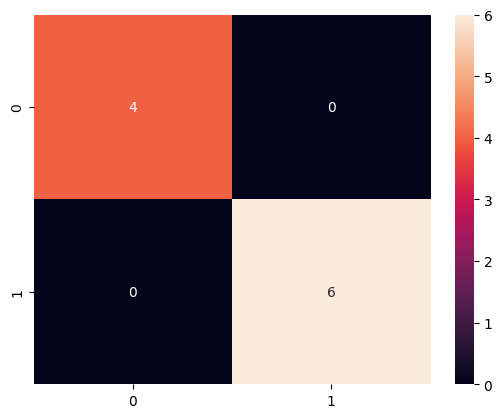

In [56]:
heatmap(cm, annot = True)
print(y_test)
print(pred)

In [55]:
model.save("model.h5")